In [18]:
import pandas as pd

# Step 1: Load the original raw CSV
raw_path = "C:/Users/troyr/OneDrive - Self Taught LLC/PythonDev/03-projects/fred-trade-analysis/data/TARIFF_EVENTS.csv"
df = pd.read_csv(raw_path, index_col=False)

# Step 2: Clean up the Date column
df["Date"] = pd.to_datetime(df["Date"], format="%Y-%m-%d", errors="coerce")

# Step 3: Confirm structure and manually review any rows that failed
bad_rows = df[df["Date"].isna()]
if not bad_rows.empty:
    print("⚠️ Rows with invalid dates found (fix manually or remove):")
    display(bad_rows)

# Step 4: Drop invalid date rows (optional)
df = df[df["Date"].notna()]

# Step 5: Save cleaned version (with proper Date column, not index)
save_path = "C:/Users/troyr/OneDrive - Self Taught LLC/PythonDev/03-projects/fred-trade-analysis/data/TARIFF_EVENTS_CLEANED.csv"
df.to_csv(save_path, index=False)

print(f"✅ Cleaned CSV saved to:\n{save_path}")

# Step 6: Display first few rows to confirm
df.sort_values("Date").head()


✅ Cleaned CSV saved to:
C:/Users/troyr/OneDrive - Self Taught LLC/PythonDev/03-projects/fred-trade-analysis/data/TARIFF_EVENTS_CLEANED.csv


C:\Users\troyr\AppData\Local\Temp\ipykernel_24076\2956135257.py:5: ParserWarning: Length of header or names does not match length of data. This leads to a loss of data with index_col=False.
  df = pd.read_csv(raw_path, index_col=False)


,Date,Event_Name,Description,Event_Type,Strength,Notes
0,1930-06-17,Smoot-Hawley Tariff Act,Raised tariffs on 20,000+ imports,Policy,High
1,1962-01-01,Trade Expansion Act,Enabled Kennedy Round of tariff reductions,Policy,Moderate,NaN
2,1981-05-01,Voluntary Export Restraints,Japan auto exports restricted,Agreement,High,NaN
3,2018-03-23,Section 232 Steel/Aluminum Tariffs,25% steel and 10% aluminum tariffs,Executive,High,Start of trade war
4,2018-07-06,Section 301 China Tariffs,$34B in tariffs on Chinese goods,Executive,High,China retaliation begins


✅ Final plot saved to: C:/Users/troyr/OneDrive - Self Taught LLC/PythonDev/03-projects/fred-trade-analysis/data\..\outputs\gdp_gnp_comparison_with_events.png


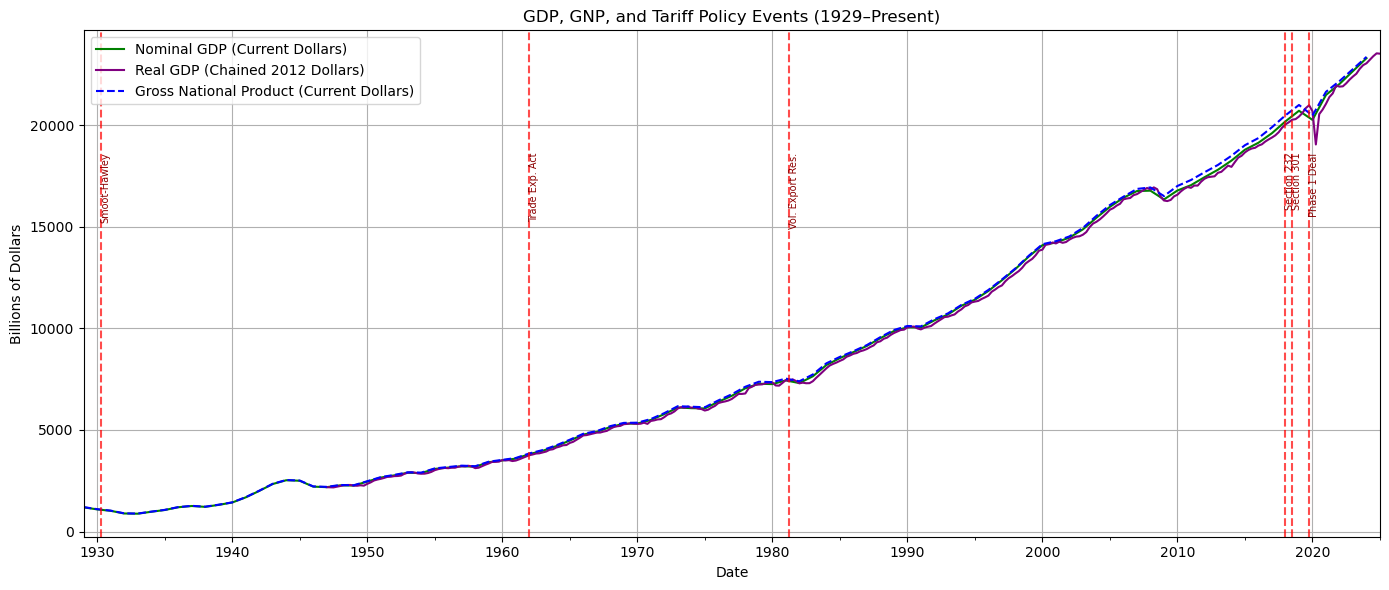

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import os

# === Load each series ===
data_dir = "C:/Users/troyr/OneDrive - Self Taught LLC/PythonDev/03-projects/fred-trade-analysis/data"
gdpc1 = pd.read_csv(f"{data_dir}/GDPC1.csv", index_col="Date", parse_dates=True)
gdpca = pd.read_csv(f"{data_dir}/GDPCA.csv", index_col="Date", parse_dates=True)
gnpca = pd.read_csv(f"{data_dir}/GNPCA.csv", index_col="Date", parse_dates=True)

# === Load short-labeled tariff events ===
events = pd.read_csv(f"{data_dir}/TARIFF_EVENTS_LABELED.csv", parse_dates=["Date"])
events = events[events["Date"].notna()]

# === Start the plot ===
plt.figure(figsize=(14, 6))

# Plot each line explicitly
gdpca.plot(ax=plt.gca(), label="Nominal GDP", color="green")
gdpc1.plot(ax=plt.gca(), label="Real GDP (Chained 2012)", color="purple")
gnpca.plot(ax=plt.gca(), label="GNP", color="blue", linestyle="--")

# Overlay event markers
label_y = gdpca.max().values[0] * 0.80
for _, row in events.iterrows():
    label = row["Short_Label"]
    plt.axvline(x=row["Date"], color="red", linestyle="--", alpha=0.7)
    plt.text(row["Date"], label_y, label, rotation=90, fontsize=7, color="darkred", verticalalignment='top')

# === Finalize chart ===
plt.title("GDP, GNP, and Tariff Policy Events (1929–Present)")
plt.xlabel("Date")
plt.ylabel("Billions of Dollars")
plt.grid(True)
plt.legend()
plt.tight_layout()

# === Save it ===
output_dir = os.path.join(data_dir, "..", "outputs")
os.makedirs(output_dir, exist_ok=True)
output_path = os.path.join(output_dir, "gdp_gnp_comparison_with_events.png")
plt.savefig(output_path)
print(f"✅ Final plot saved to: {output_path}")

plt.show()


GDPC1 range: 1947-01-01 00:00:00 → 2025-01-01 00:00:00
GDPCA range: 1929-01-01 00:00:00 → 2024-01-01 00:00:00
GNPCA range: 1929-01-01 00:00:00 → 2024-01-01 00:00:00
✅ Plot saved to: C:/Users/troyr/OneDrive - Self Taught LLC/PythonDev/03-projects/fred-trade-analysis/outputs\gdp_gnp_comparison.png


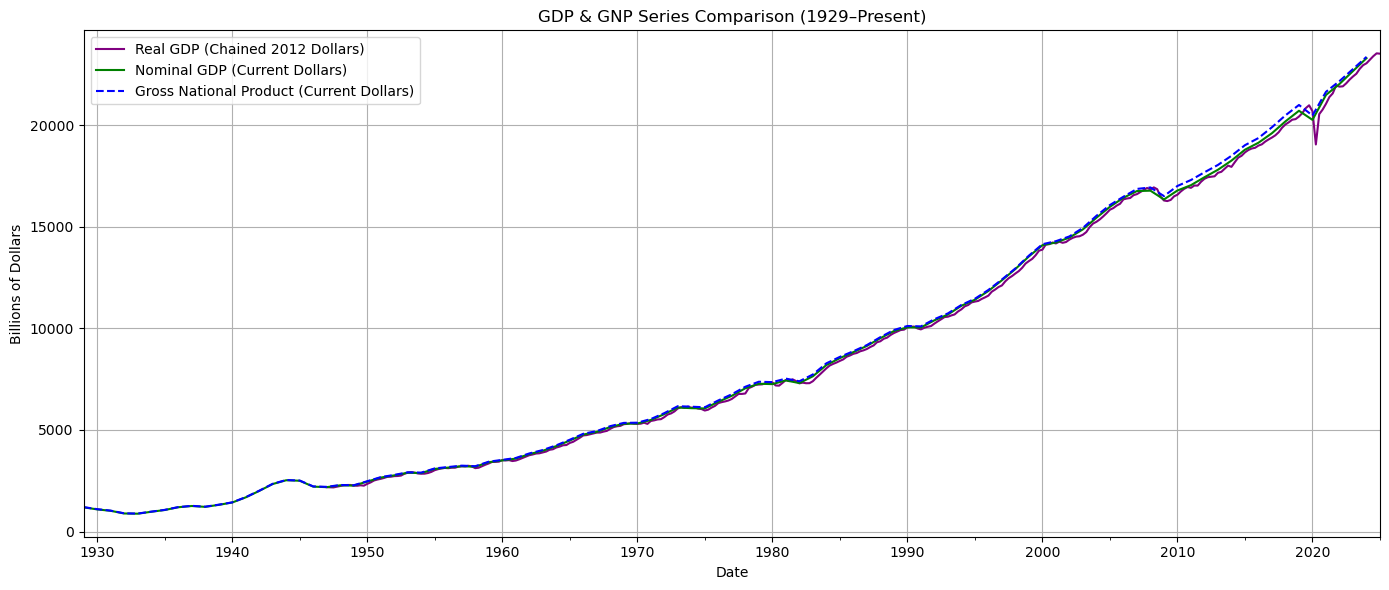

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import os

# Load each CSV
gdpc1_path = "C:/Users/troyr/OneDrive - Self Taught LLC/PythonDev/03-projects/fred-trade-analysis/data/GDPC1.csv"
gdpca_path = "C:/Users/troyr/OneDrive - Self Taught LLC/PythonDev/03-projects/fred-trade-analysis/data/GDPCA.csv"
gnpca_path = "C:/Users/troyr/OneDrive - Self Taught LLC/PythonDev/03-projects/fred-trade-analysis/data/GNPCA.csv"

gdpc1 = pd.read_csv(gdpc1_path, index_col="Date", parse_dates=True)
gdpca = pd.read_csv(gdpca_path, index_col="Date", parse_dates=True)
gnpca = pd.read_csv(gnpca_path, index_col="Date", parse_dates=True)

# Preview start and end dates
print("GDPC1 range:", gdpc1.index.min(), "→", gdpc1.index.max())
print("GDPCA range:", gdpca.index.min(), "→", gdpca.index.max())
print("GNPCA range:", gnpca.index.min(), "→", gnpca.index.max())

# Plot them all
plt.figure(figsize=(14, 6))
gdpc1.plot(ax=plt.gca(), label="Real GDP (Chained 2012)", color="purple")
gdpca.plot(ax=plt.gca(), label="Nominal GDP", color="green")
gnpca.plot(ax=plt.gca(), label="GNP", color="blue", linestyle="--")

plt.title("GDP & GNP Series Comparison (1929–Present)")
plt.xlabel("Date")
plt.ylabel("Billions of Dollars")
plt.grid(True)
plt.legend()
plt.tight_layout()

# === Save plot to outputs/ directory ===
output_dir = "C:/Users/troyr/OneDrive - Self Taught LLC/PythonDev/03-projects/fred-trade-analysis/outputs"
os.makedirs(output_dir, exist_ok=True)

output_path = os.path.join(output_dir, "gdp_gnp_comparison.png")
plt.savefig(output_path)
print(f"✅ Plot saved to: {output_path}")

plt.tight_layout()
plt.show()



✅ Normalized plot saved to: C:/Users/troyr/OneDrive - Self Taught LLC/PythonDev/03-projects/fred-trade-analysis/outputs\normalized_gdp_gnp_1929.png


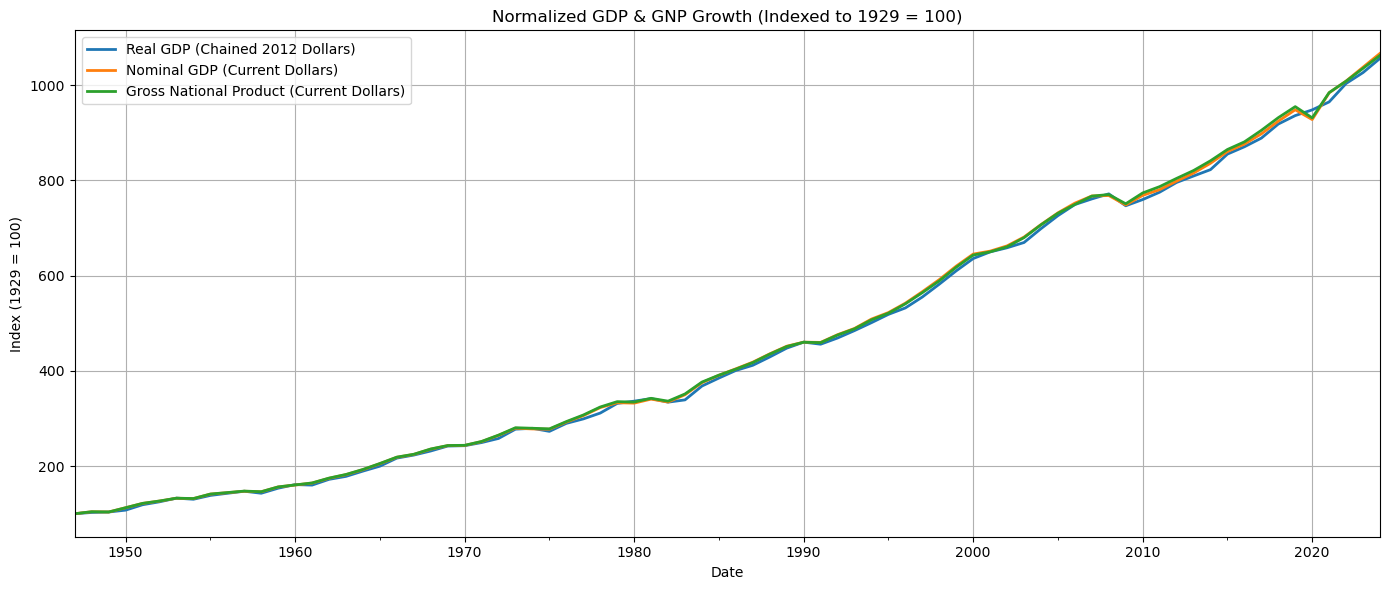

In [21]:
import pandas as pd
import matplotlib.pyplot as plt

# === Load each series ===
gdpc1 = pd.read_csv("C:/Users/troyr/OneDrive - Self Taught LLC/PythonDev/03-projects/fred-trade-analysis/data/GDPC1.csv", index_col="Date", parse_dates=True)
gdpca = pd.read_csv("C:/Users/troyr/OneDrive - Self Taught LLC/PythonDev/03-projects/fred-trade-analysis/data/GDPCA.csv", index_col="Date", parse_dates=True)
gnpca = pd.read_csv("C:/Users/troyr/OneDrive - Self Taught LLC/PythonDev/03-projects/fred-trade-analysis/data/GNPCA.csv", index_col="Date", parse_dates=True)

# === Join all into one DataFrame ===
df = gdpc1.join(gdpca, how="outer").join(gnpca, how="outer")

# === Normalize all to 1929 = 100 ===
df = df.dropna()  # Keep only overlapping dates
df_norm = df / df.iloc[0] * 100  # Index to first row (1929)

# === Plot normalized series ===
plt.figure(figsize=(14, 6))
df_norm.plot(ax=plt.gca(), linewidth=2)

plt.title("Normalized GDP & GNP Growth (Indexed to 1929 = 100)")
plt.xlabel("Date")
plt.ylabel("Index (1929 = 100)")
plt.grid(True)
plt.legend()
plt.tight_layout()

# === Save to outputs/ ===
import os
output_dir = "C:/Users/troyr/OneDrive - Self Taught LLC/PythonDev/03-projects/fred-trade-analysis/outputs"
os.makedirs(output_dir, exist_ok=True)

output_path = os.path.join(output_dir, "normalized_gdp_gnp_1929.png")
plt.savefig(output_path)
print(f"✅ Normalized plot saved to: {output_path}")

plt.tight_layout()
plt.show()
